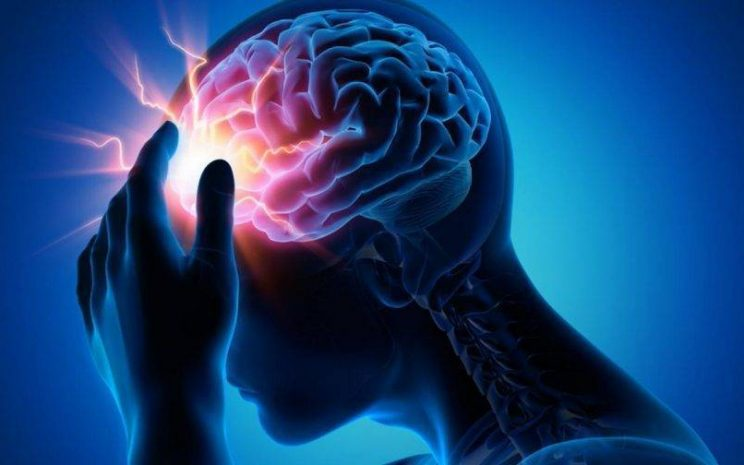

#Introducción

El accidente cerebrovascular (ACV) representa una de las principales causas de discapacidad y mortalidad en el mundo. La detección temprana de los factores de riesgo asociados puede marcar una diferencia significativa en la prevención de estos eventos y en la mejora del pronóstico de los pacientes.

El objetivo de este proyecto es identificar la probabilidad de que un individuo sufra un ACV, a través del análisis exploratorio de datos. Para ello, se utilizarán herramientas estadísticas y representaciones gráficas que permitan reconocer patrones relevantes, relaciones entre variables y posibles señales de alerta temprana.

*A partir de esta problemática, nos planteamos las siguientes preguntas:*

    -¿Qué variables presentan una mayor asociación con la ocurrencia de un ACV?

    -¿Existen diferencias significativas en el riesgo de ACV según la edad o condiciones preexistentes?

    -¿Puede un análisis exploratorio ayudar a anticipar la probabilidad de ACV antes de que ocurran los síntomas?



In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats


#from sklearn.model_selection import train_test_split
# Las comentadas son para futuro uso pero aún no están en uso

In [95]:
# Nota  
#Este notebook requiere tener instaladas las siguientes librerías:  
#`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `notebook`  
#Si no las tienes, ejecuta en la terminal:
#`pip install pandas numpy matplotlib seaborn scikit-learn notebook`

Introducción: En este notebook realizaremos un análisis exhaustivo respecto a un dataset relacionado con accidentes cerebrovasculares en las personas. Este dataset nos menciona ciertas características de las realidades de gente que ha sido o no afectada por este suceso, ayudándonos a relacionar y estudiar posibles componentes que puedan asociarse al surgimiento de esta enfermedad. 


In [96]:
#Lectura del archivo .csv
df = pd.read_csv("stroke-dataset.csv")

#Exploración de datos

In [97]:
#Vista de los primeros datos
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [98]:
#Muestra el tipo de dato de cada atributo
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Se observa el tipo cada columna de datos

In [99]:
#Describe de todo el dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Descripción general de los datos, mostrando la cantidad de datos, los mínimos, los máximos, y los cuartiles de cada columna.

In [100]:
df['age'].mode() #Moda


0    78.0
Name: age, dtype: float64

La moda de la edad. Se puede observar que la edad que más se reptitió fueron 78 años.

In [101]:
df['age'].median() #Mediana

np.float64(45.0)

La mediana de la edad. Se observa que el 50% de las personas tienen a lo más 45 años.

In [102]:
#Describe con stroke == 1
df[df['stroke'] == 1].describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Descripción general de los datos de las personas a las que les dió un stroke, mostrando la cantidad de datos, los mínimos, los máximos, y los cuartiles de cada columna.
Se observa que 249 personas tuvieron un stroke de las 5110 que se recolectaron datos. Además se puede observar que la mediana de las personas con stroke esta en los 71 años, lo cual es una edad avanzada, nivel de glucosa de 105,2, lo cual es alto y un bmi de 29,7, lo cual es conciderado sobrepeso.

In [103]:
#Verifica la cantidad de datos NaN según categoría
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Se reconocen los valores nulos en la tabla, indicando que en la columna bmi hay 201 valores nulos.

In [104]:
#Muestra si se conoce o no si es que fuma
fumadores_desconocidos = df[df["smoking_status"] == "Unknown"]
print(fumadores_desconocidos)
print((df["smoking_status"] == "Unknown").sum())

         id  gender   age  hypertension  heart_disease ever_married work_type  \
8     27419  Female  59.0             0              0          Yes   Private   
9     60491  Female  78.0             0              0          Yes   Private   
13     8213    Male  78.0             0              1          Yes   Private   
19    25226    Male  57.0             0              1           No  Govt_job   
23    64778    Male  82.0             0              1          Yes   Private   
...     ...     ...   ...           ...            ...          ...       ...   
5098    579    Male   9.0             0              0           No  children   
5101  36901  Female  45.0             0              0          Yes   Private   
5103  22127  Female  18.0             0              0           No   Private   
5104  14180  Female  13.0             0              0           No  children   
5109  44679  Female  44.0             0              0          Yes  Govt_job   

     Residence_type  avg_gl

Se reconocen las personas cuya información de si fuman es desconocida, siendo esta parte importante de la muestra.

In [105]:
#Verificar si hay alguna edad sin sentido (outliers)
print("Edad máxima:", df['age'].max())
print("Edad minima:", df['age'].min())

Edad máxima: 82.0
Edad minima: 0.08


Se ve la edad mínima y la edad máxima que hay en los datos. Se confirma que no existen edades que no tengan sentido.

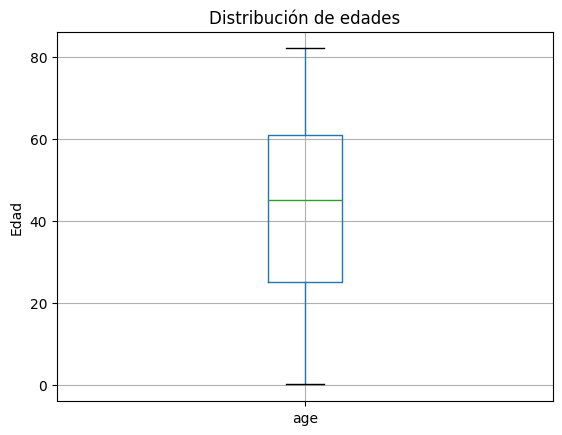

In [106]:
#pip install matplotlib 
#Verificar outliers edad
import matplotlib.pyplot as plt
df.boxplot(column='age')
plt.title('Distribución de edades')
plt.ylabel('Edad')

plt.show()

Gráfico de caja de las edades. Se observa que no existen outliers.

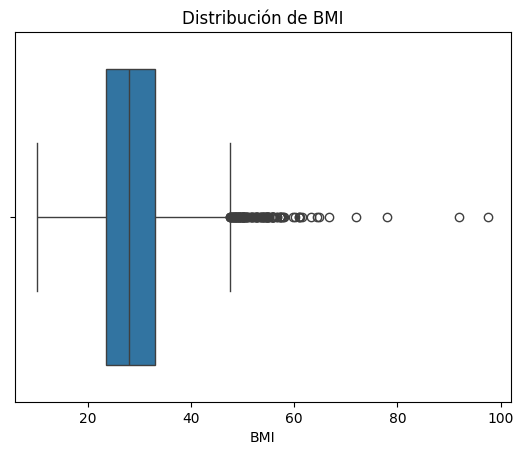

In [141]:
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.show()


Gráfico de caja de los BMI, se observa que existen muchos outliers. Estos se explica ya que la mayoría de las personas suelen tener

Aquí podemos observar variedad de outliers, los cuales decidimos conservar pues creemos serán útiles para el análisis

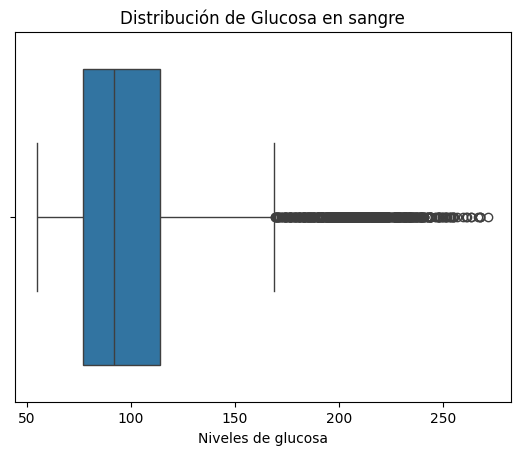

In [108]:
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Distribución de Glucosa en sangre')
plt.xlabel('Niveles de glucosa')
plt.show()


Lo mismo sucede acá, con mayor cantidad de outliers pero también conservados para el análisis

#Limpieza del dataset

En esta sección nos encargaremos de filtrar todo lo que no sirva para el análisis o que pueda contaminar los datos.

In [109]:
#Cantidad de filas en el dataset antes de eliminación de NaN
len(df) 

5110

In [110]:
#Eliminar filas que contienen valores NaN  
df = df.dropna(axis=0)

In [111]:
#Cantidad de filas en el dataset post eliminación de NaN
len(df)

4909

In [112]:
#Revisar si hay datos duplicados (no los borra en caso de existir)
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [113]:
#Cantidad de filas antes de borrar outliers BMI
len(df) 

4909

In [114]:
#Mostrar outliers BMI
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["bmi"] < limite_inferior) | (df["bmi"] > limite_superior)]
print(outliers)


df_sin = df[(df["bmi"] >= limite_inferior) & (df["bmi"] <= limite_superior)]

9.099999999999998 47.5
         id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
270   72911  Female  57.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4858   1696  Female  43.0             0              0          Yes   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
21    Self-employed          Urban          

In [115]:
#Cantidad de filas después de borrar outliers BMI
len(df_sin) 

4799

In [116]:
#Mostrar outliers
Q1 = df["avg_glucose_level"].quantile(0.25)
Q3 = df["avg_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, limite_superior)
outliers = df[(df["avg_glucose_level"] < limite_inferior) | (df["avg_glucose_level"] > limite_superior)]

print(outliers)

df_sin = df_sin[(df["avg_glucose_level"] >= limite_inferior) & (df["avg_glucose_level"] <= limite_superior)]

22.319999999999993 168.32
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
14     5317  Female  79.0             0              1          Yes   
...     ...     ...   ...           ...            ...          ...   
5061  38009    Male  41.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5063  68967    Male  39.0             0              0          Yes   
5064  66684    Male  70.0             0              0          Yes   
5076  39935  Female  34.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban       

C:\Users\gabol\AppData\Local\Temp\ipykernel_16932\3680756589.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sin = df_sin[(df["avg_glucose_level"] >= limite_inferior) & (df["avg_glucose_level"] <= limite_superior)]


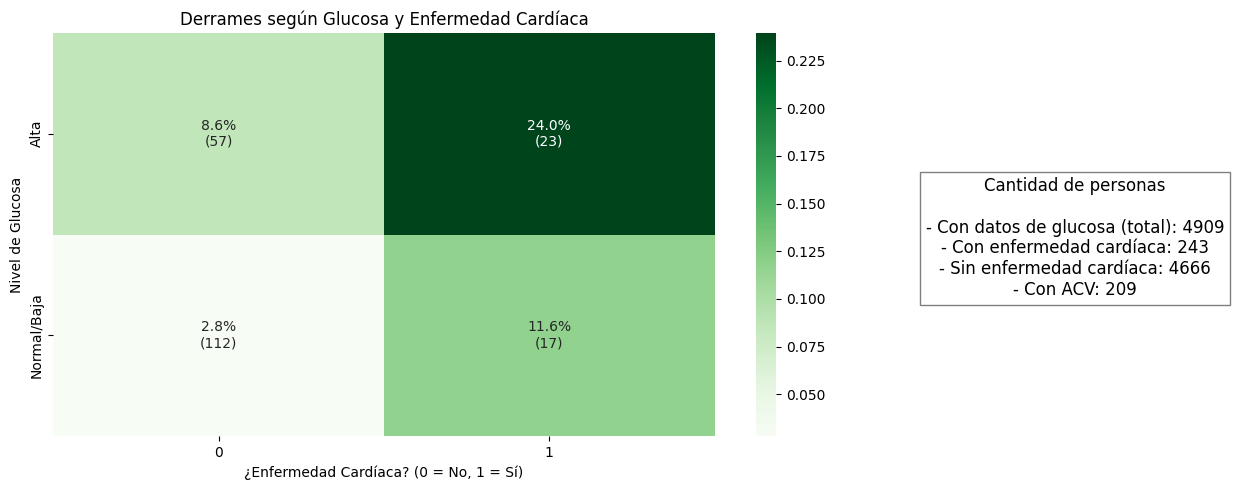

In [144]:
df_grafico = df.copy()

# Filtrar datos válidos
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar glucosa
df_grafico['glucosa_cat'] = np.where(df_grafico['avg_glucose_level'] > 140, 'Alta', 'Normal/Baja')

# Porcentaje de stroke por grupo
prop_glucosa_heart = df_grafico.groupby(['glucosa_cat', 'heart_disease'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas CON stroke por grupo
n_strokes = df_grafico[df_grafico['stroke'] == 1].groupby(['glucosa_cat', 'heart_disease'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=21)"
anotaciones = prop_glucosa_heart.copy().astype(str)
for fila in prop_glucosa_heart.index:
    for col in prop_glucosa_heart.columns:
        pct = prop_glucosa_heart.loc[fila, col]
        n = n_strokes.loc[fila, col] if not pd.isna(n_strokes.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para el cuadro lateral
cantidad_gente_glucosa = df_grafico['avg_glucose_level'].count()
cantidad_enfermedad_cardiaca = (df_grafico['heart_disease'] == 1).sum()
cantidad_sin_enfermedad_cardiaca = (df_grafico['heart_disease'] == 0).sum()
total_con_stroke = (df_grafico['stroke'] == 1).sum()

# Graficar heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(prop_glucosa_heart, cmap="Greens", annot=anotaciones, fmt="", cbar=True)
plt.title("Derrames según Glucosa y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Nivel de Glucosa")



# Texto informativo a la derecha 
plt.figtext(1.2, 0.4,
            f"Cantidad de personas\n\n"
            f"- Con datos de glucosa (total): {cantidad_gente_glucosa}\n"
            f"- Con enfermedad cardíaca: {cantidad_enfermedad_cardiaca}\n"
            f"- Sin enfermedad cardíaca: {cantidad_sin_enfermedad_cardiaca}\n"
            f"- Con ACV: {total_con_stroke}",
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", alpha=0.5))


plt.tight_layout()
plt.show()

Con este mapa de calor podemos observar como los casos de ACV se concentran considerablemente más en las personas con enfermedad cardíaca

In [ ]:
df_grafico = df.copy()

# Categorizar IMC
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)


# Porcentaje de stroke
porcentaje = df_grafico.groupby(['bmi_cat', 'smoking_status'], observed=True)['stroke'].mean().unstack()

# Cantidad total por grupo
cantidad = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'smoking_status'], observed=True).size().unstack()

# Anotaciones
anotaciones = porcentaje.copy().astype(str)
for fila in porcentaje.index:
    for col in porcentaje.columns:
        pct = porcentaje.loc[fila, col]
        n = cantidad.loc[fila, col]
        if pd.isna(pct) or pd.isna(n):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para el cuadro informativo
total = len(df_grafico)
categorias_fumar = df_grafico['smoking_status'].value_counts(dropna=False)
total_con_stroke = (df_grafico['stroke'] == 1).sum()
texto_info = (
    f"Cantidad de personas\n\n"
    f"- Total con datos: {total}\n"
    f"- Con ACV: {total_con_stroke}",
)
for cat, count in categorias_fumar.items():
    texto_info += f"- {cat}: {count}\n"

# Gráfico
plt.figure(figsize=(11, 6))
sns.heatmap(porcentaje, cmap="Reds", annot=anotaciones, fmt="", cbar=True)
plt.title("Porcentaje de pacientes con derrame cerebral según IMC y tabaquismo")
plt.xlabel("Estado de tabaquismo")
plt.ylabel("Categoría de IMC")

# Cuadro al costado
plt.figtext(1.2, 0.4, texto_info,
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

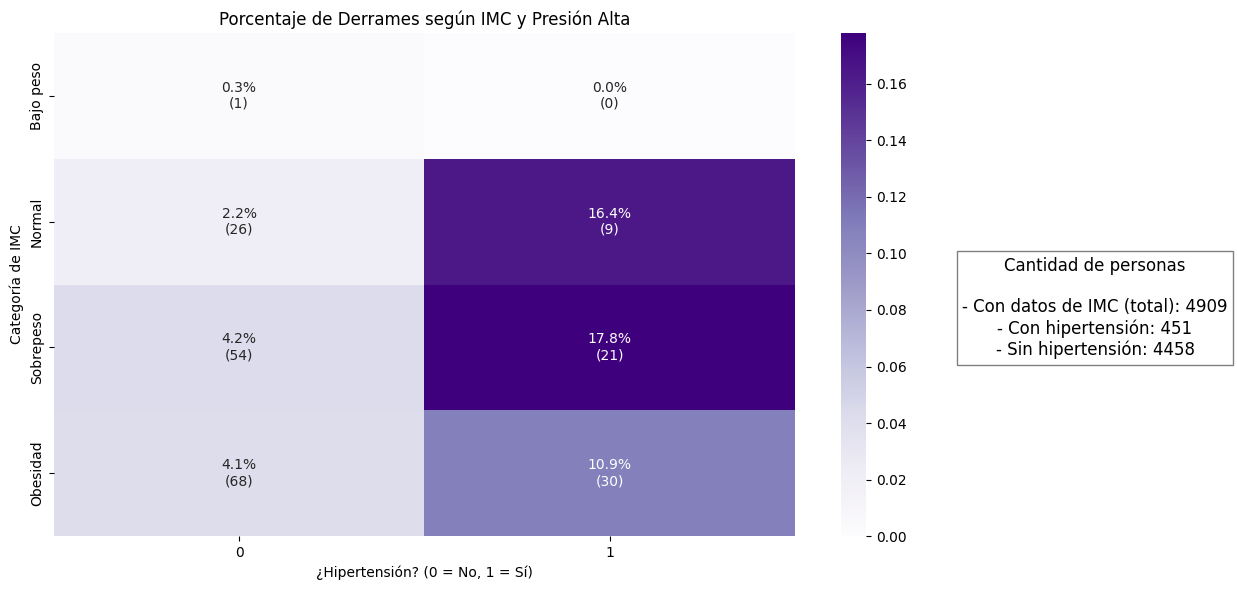

In [119]:
df_grafico = df.copy()

# Filtrar para mantener solo los que tienen stroke definido
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar BMI
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)

# Porcentaje de stroke
prop_bmi_hyper = df_grafico.groupby(['bmi_cat', 'hypertension'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas CON stroke por grupo (esto es lo nuevo)
n_stroke = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'hypertension'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=21)"
anotaciones = prop_bmi_hyper.copy().astype(str)

for fila in prop_bmi_hyper.index:
    for col in prop_bmi_hyper.columns:
        pct = prop_bmi_hyper.loc[fila, col]
        n = n_stroke.loc[fila, col] if not pd.isna(n_stroke.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(prop_bmi_hyper, cmap="Purples", annot=anotaciones, fmt="", cbar=True)
plt.title("Porcentaje de Derrames según IMC y Presión Alta")
plt.xlabel("¿Hipertensión? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")
plt.tight_layout()
cant_personas_bmi = df["bmi"].count()
cant_personas_con_hipertension = df[df["hypertension"] == 1]["hypertension"].count()
cant_personas_sin_hipertension = df[df["hypertension"] == 0]["hypertension"].count()
plt.figtext(1.1, 0.4, 
    f"Cantidad de personas\n\n"
    f"- Con datos de IMC (total): {cant_personas_bmi}\n"
    f"- Con hipertensión: {cant_personas_con_hipertension}\n"
    f"- Sin hipertensión: {cant_personas_sin_hipertension}",
    fontsize=12, color="black", ha="center", 
    bbox=dict(facecolor="white", alpha=0.5)
)
plt.show()



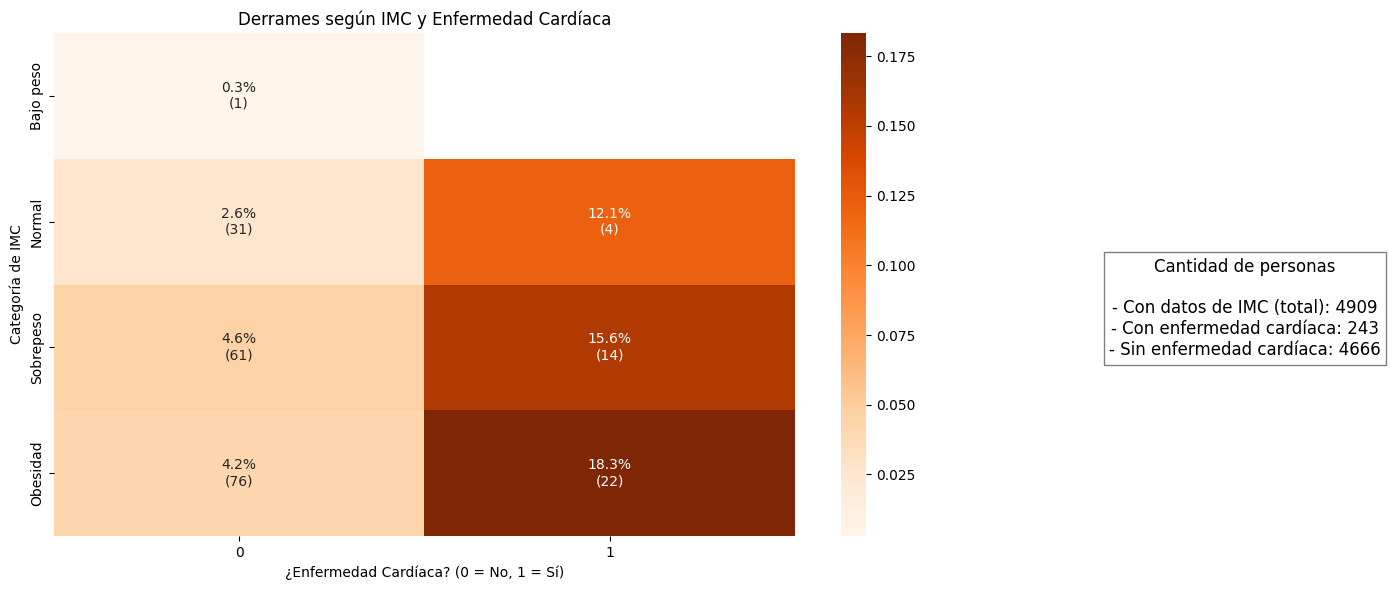

In [120]:
df_grafico = df.copy()

# Asegurarse de excluir valores nulos en 'stroke'
df_grafico = df_grafico[df_grafico['stroke'].notna()]

# Categorizar IMC
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins, labels=labels)

# Porcentaje de stroke por combinación
prop_bmi_heart = df_grafico.groupby(['bmi_cat', 'heart_disease'], observed=True)['stroke'].mean().unstack()

# Cantidad de personas con stroke en cada grupo
n_stroke = df_grafico[df_grafico['stroke'] == 1].groupby(['bmi_cat', 'heart_disease'], observed=True).size().unstack()

# Crear anotaciones tipo "4.8%\n(n=23)"
anotaciones = prop_bmi_heart.copy().astype(str)
for fila in prop_bmi_heart.index:
    for col in prop_bmi_heart.columns:
        pct = prop_bmi_heart.loc[fila, col]
        n = n_stroke.loc[fila, col] if not pd.isna(n_stroke.loc[fila, col]) else 0
        if pd.isna(pct):
            anotaciones.loc[fila, col] = ""
        else:
            anotaciones.loc[fila, col] = f"{pct:.1%}\n({int(n)})"

# Totales para cuadro informativo
cantidad_personas_imc = df_grafico['bmi'].count()
cantidad_con_enfermedad_cardiaca = (df_grafico['heart_disease'] == 1).sum()
cantidad_sin_enfermedad_cardiaca = (df_grafico['heart_disease'] == 0).sum()

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(prop_bmi_heart, cmap="Oranges", annot=anotaciones, fmt="", cbar=True)

plt.title("Derrames según IMC y Enfermedad Cardíaca")
plt.xlabel("¿Enfermedad Cardíaca? (0 = No, 1 = Sí)")
plt.ylabel("Categoría de IMC")

# Cuadro informativo a la derecha
plt.figtext(1.25, 0.4,
            f"Cantidad de personas\n\n"
            f"- Con datos de IMC (total): {cantidad_personas_imc}\n"
            f"- Con enfermedad cardíaca: {cantidad_con_enfermedad_cardiaca}\n"
            f"- Sin enfermedad cardíaca: {cantidad_sin_enfermedad_cardiaca}",
            fontsize=12, color="black", ha="center",
            bbox=dict(facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

Decimos quedarnos con las variables: 

*Principales*
- Edad  
- Glucosa  

*Secundarias* 
- BMI  
- Enfermedad cardiaca


In [121]:
#Mediana
df.groupby('stroke')[['age', 'avg_glucose_level', 'bmi', 'heart_disease']].median()

,age,avg_glucose_level,bmi,heart_disease
stroke,,,,
0,43.0,91.21,28.0,0.0
1,70.0,106.58,29.7,0.0


In [122]:
pd.crosstab(df['stroke'], df['hypertension'], normalize='index')

hypertension,0,1
stroke,,
0,0.916809,0.083191
1,0.712919,0.287081


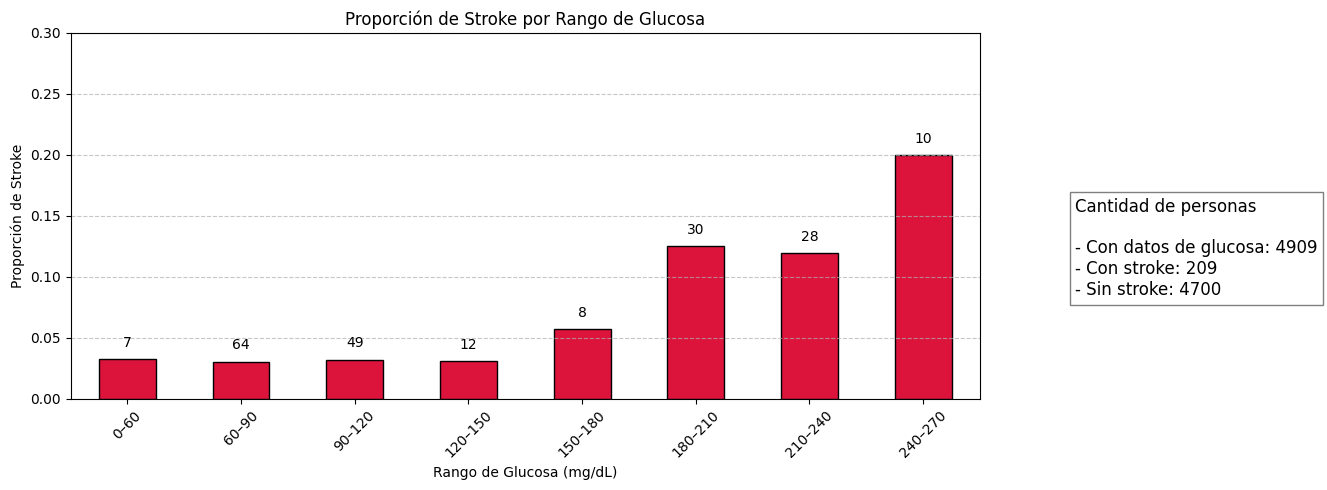

In [123]:
# Crear columna de bins
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]
df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Proporción de stroke por bin
stroke_rates = df.groupby('glucose_bin', observed=True)['stroke'].mean()

# Cantidad de personas con stroke por bin
counts = df[df['stroke'] == 1].groupby('glucose_bin', observed=True).size()

# Gráfico
plt.figure(figsize=(10, 5))
bars = stroke_rates.plot(kind='bar', color='crimson', edgecolor='black')

# Anotar las cantidades sobre cada barra
for i, count in enumerate(counts):
    plt.text(i, stroke_rates.iloc[i] + 0.01, f'{count}', ha='center', fontsize=10)

# Título y etiquetas
plt.title('Proporción de Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Proporción de Stroke')
plt.ylim(0, 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Totales generales
cant_total = df['avg_glucose_level'].count()
cant_con_stroke = df[df['stroke'] == 1]['stroke'].count()
cant_sin_stroke = df[df['stroke'] == 0]['stroke'].count()

plt.figtext(1.08, 0.4,
    f"Cantidad de personas\n\n"
    f"- Con datos de glucosa: {cant_total}\n"
    f"- Con stroke: {cant_con_stroke}\n"
    f"- Sin stroke: {cant_sin_stroke}",
    fontsize=12, color="black", ha="left",
    bbox=dict(facecolor="white", alpha=0.5)
)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

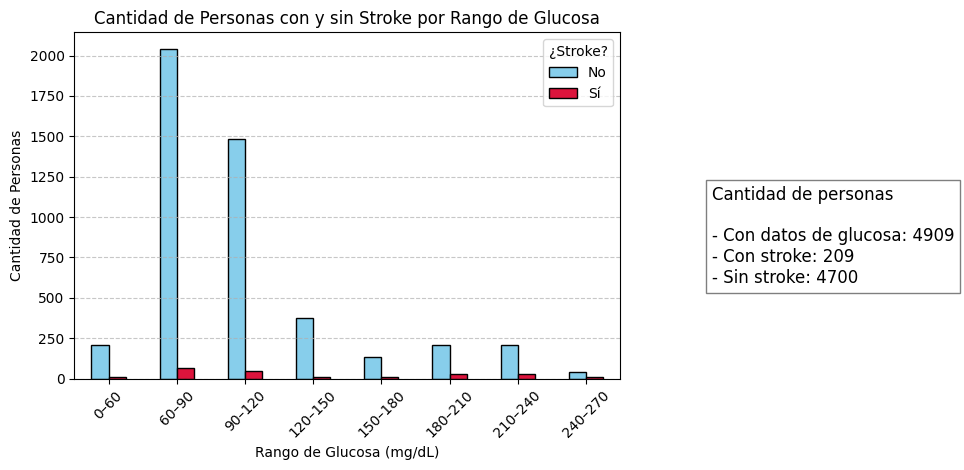

In [124]:
# Crear bins
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270]
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

df['glucose_bin'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Agrupar por bin y stroke (0 o 1), contar personas
stroke_bin_counts = df.groupby(['glucose_bin', 'stroke'], observed=True).size().unstack(fill_value=0)

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
stroke_bin_counts.plot(kind='bar', stacked=False, color=['skyblue', 'crimson'], edgecolor='black')

plt.title('Cantidad de Personas con y sin Stroke por Rango de Glucosa')
plt.xlabel('Rango de Glucosa (mg/dL)')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='¿Stroke?', labels=['No', 'Sí'], loc='upper right')

# Cuadro resumen a la derecha
cant_total = df["avg_glucose_level"].count()
cant_con_stroke = df[df["stroke"] == 1]["stroke"].count()
cant_sin_stroke = df[df["stroke"] == 0]["stroke"].count()

plt.figtext(1.12, 0.4,
    f"Cantidad de personas\n\n"
    f"- Con datos de glucosa: {cant_total}\n"
    f"- Con stroke: {cant_con_stroke}\n"
    f"- Sin stroke: {cant_sin_stroke}",
    fontsize=12, color="black", ha="left",
    bbox=dict(facecolor="white", alpha=0.5)
)

plt.tight_layout()
plt.show()


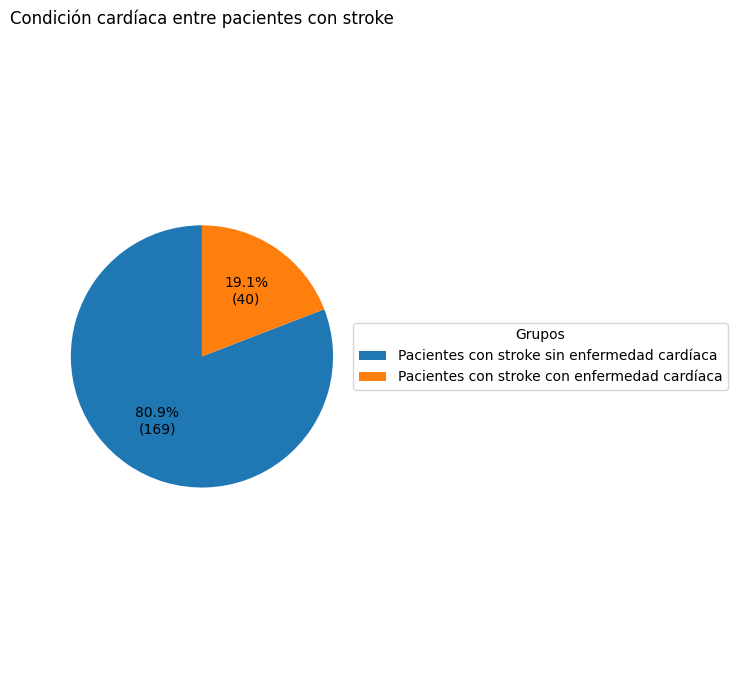

In [125]:
# Filtramos solo las personas que han sufrido un stroke
con_stroke = df[df['stroke'] == 1]

# Contamos cuántos tienen o no tienen enfermedad cardíaca dentro del grupo de stroke
heart_cond_counts = con_stroke['heart_disease'].value_counts().sort_index()

# Etiquetas legibles (en el mismo orden)
labels = ["Sin condición cardíaca", "Con condición cardíaca"]

# Función para mostrar % y n
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({count})"
    return my_autopct

# Crear gráfico de torta
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    heart_cond_counts,
    autopct=make_autopct(heart_cond_counts),
    startangle=90,
    textprops=dict(color="black")
)

# Leyenda descriptiva
plt.legend(
    wedges,
    ["Pacientes con stroke sin enfermedad cardíaca", "Pacientes con stroke con enfermedad cardíaca"],
    title="Grupos",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Condición cardíaca entre pacientes con stroke")
plt.axis('equal')
plt.tight_layout()
plt.show()

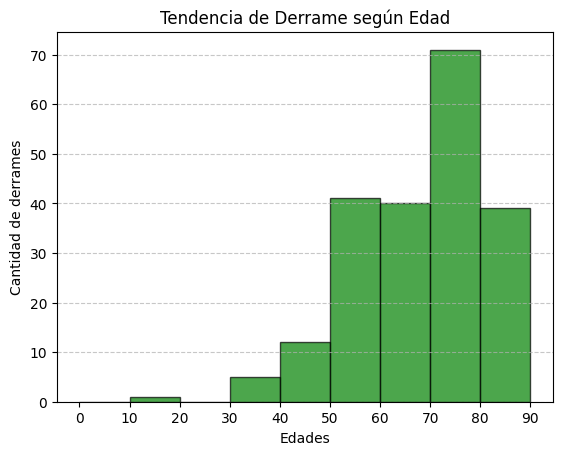

In [126]:
#Nos ayudará para separar a los que si han tenido un derrame
df_stroke = df[df["stroke"] == 1]

bins = list(range(0, 100, 10))
plt.hist(df_stroke["age"], bins=bins, edgecolor="black", alpha=0.7, color='green')
plt.title('Tendencia de Derrame según Edad')
plt.xlabel('Edades')
plt.ylabel('Cantidad de derrames')
plt.xticks(bins)  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

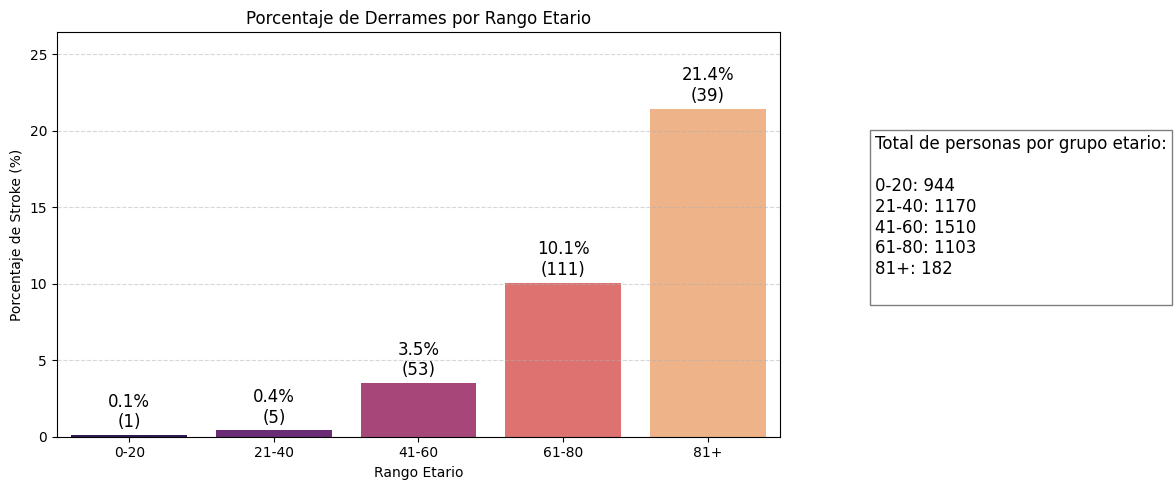

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_grafico = df.copy()

bins = [0, 20, 40, 60, 80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df_grafico['rango_edad'] = pd.cut(df_grafico['age'], bins=bins, labels=labels, right=False)

porcentajes = df_grafico.groupby('rango_edad', observed=True)['stroke'].mean() * 100
df_barplot = porcentajes.reset_index(name='stroke_pct')

cantidad_por_rango = df_grafico.groupby('rango_edad', observed=True)['stroke'].sum()

df_barplot["labels"] = df_barplot.apply(
    lambda row: f"{row['stroke_pct']:.1f}%\n({cantidad_por_rango[row['rango_edad']]})", axis=1
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_barplot, x='rango_edad', y='stroke_pct', hue='rango_edad',
                 palette="magma", legend=False)

ax.set_title("Porcentaje de Derrames por Rango Etario")
ax.set_xlabel("Rango Etario")
ax.set_ylabel("Porcentaje de Stroke (%)")
plt.ylim(0, df_barplot['stroke_pct'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        df_barplot["labels"].iloc[i],
        ha="center",
        fontsize=12,
        color="black"
    )

plt.tight_layout()
total_persons = df_grafico.groupby('rango_edad', observed=True)['age'].count()
legend_text = "Total de personas por grupo etario:\n\n"
for grupo, total in total_persons.items():
    legend_text += f"{grupo}: {total}\n"

plt.figtext(1.1, 0.4, legend_text, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

plt.show()


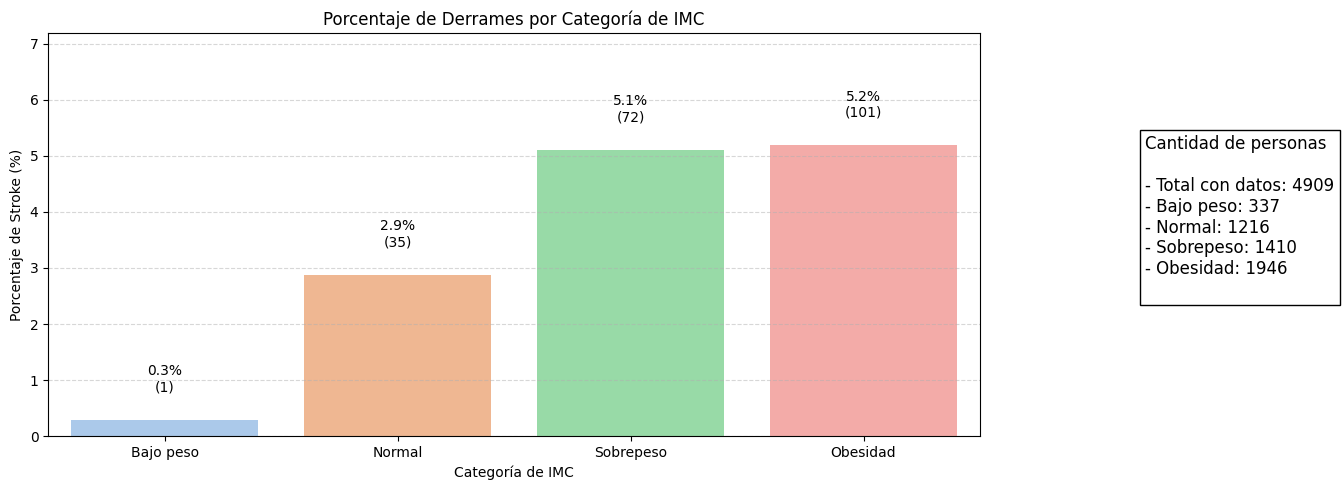

In [128]:
df_grafico = df.copy()

# Categorizar IMC
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']
df_grafico['bmi_cat'] = pd.cut(df_grafico['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

# Agrupación por categoría
df_bmi_plot = df_grafico.groupby('bmi_cat', observed=True).agg(
    n_total=('stroke', 'count'),
    n_stroke=('stroke', 'sum')
).reset_index()
df_bmi_plot['stroke_pct'] = (df_bmi_plot['n_stroke'] / df_bmi_plot['n_total']) * 100

# Preparar texto informativo
texto_info = (
    f"Cantidad de personas\n\n"
    f"- Total con datos: {df_grafico.shape[0]}\n"
)
for i, row in df_bmi_plot.iterrows():
    texto_info += f"- {row['bmi_cat']}: {int(row['n_total'])}\n"

# Crear gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bmi_plot, x='bmi_cat', y='stroke_pct', hue='bmi_cat', palette='pastel', dodge=False, legend=False)

# Título y etiquetas
plt.title("Porcentaje de Derrames por Categoría de IMC")
plt.ylabel("Porcentaje de Stroke (%)")
plt.xlabel("Categoría de IMC")
plt.ylim(0, df_bmi_plot['stroke_pct'].max() + 2)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de las barras
for index, row in df_bmi_plot.iterrows():
    plt.text(index, row['stroke_pct'] + 0.5,
             f"{row['stroke_pct']:.1f}%\n({int(row['n_stroke'])})",
             ha='center', fontsize=10)

# Cuadro informativo al costado
plt.figtext(1.15, 0.4, texto_info,
            fontsize=12, color="black", ha="left",
            bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

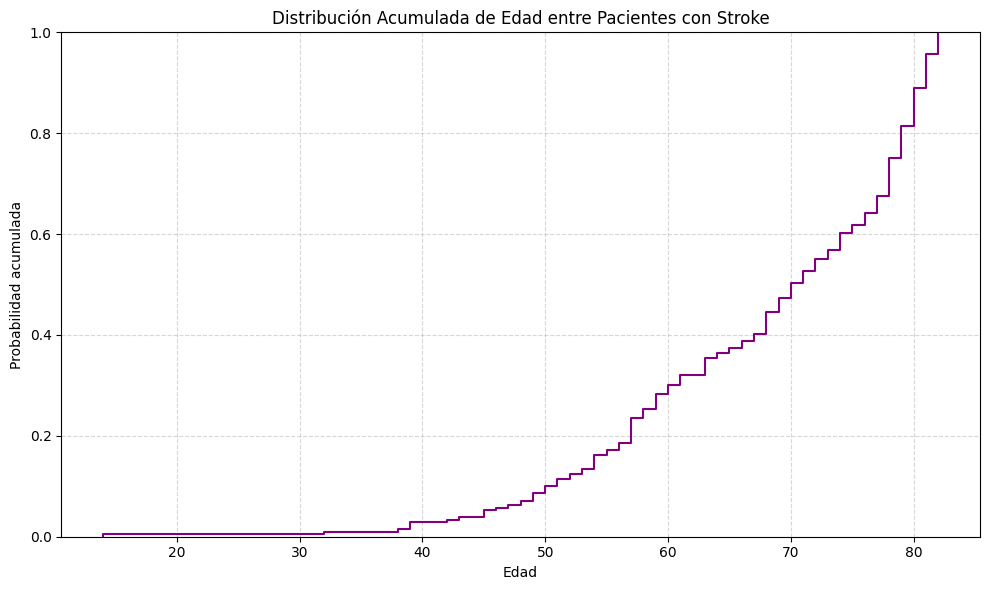

In [129]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='age', color='purple')
plt.title("Distribución Acumulada de Edad entre Pacientes con Stroke")
plt.xlabel("Edad")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

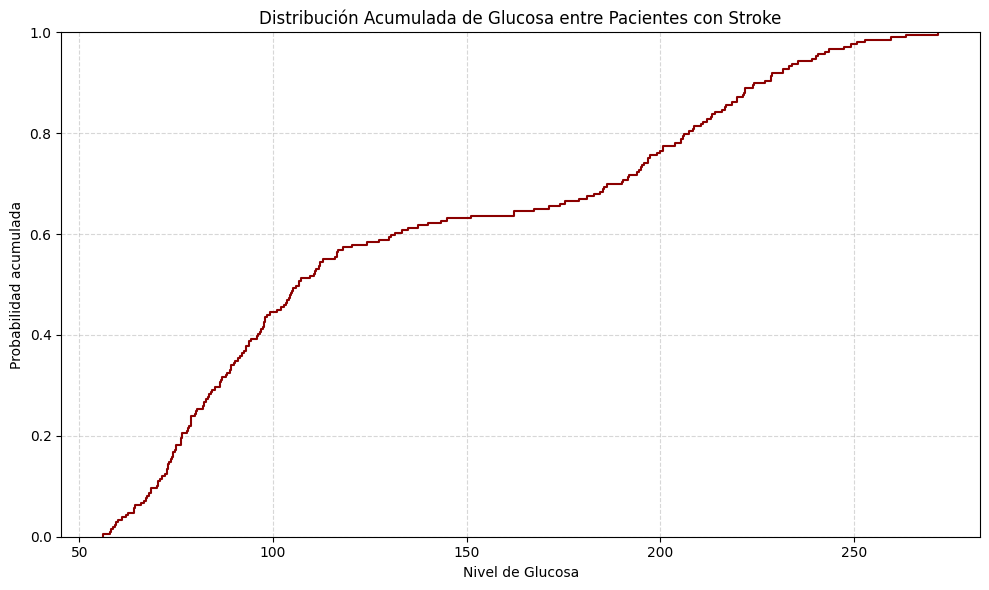

In [130]:

df_sorted = df.sort_values('avg_glucose_level').reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='avg_glucose_level', color='darkred')
plt.title("Distribución Acumulada de Glucosa entre Pacientes con Stroke")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

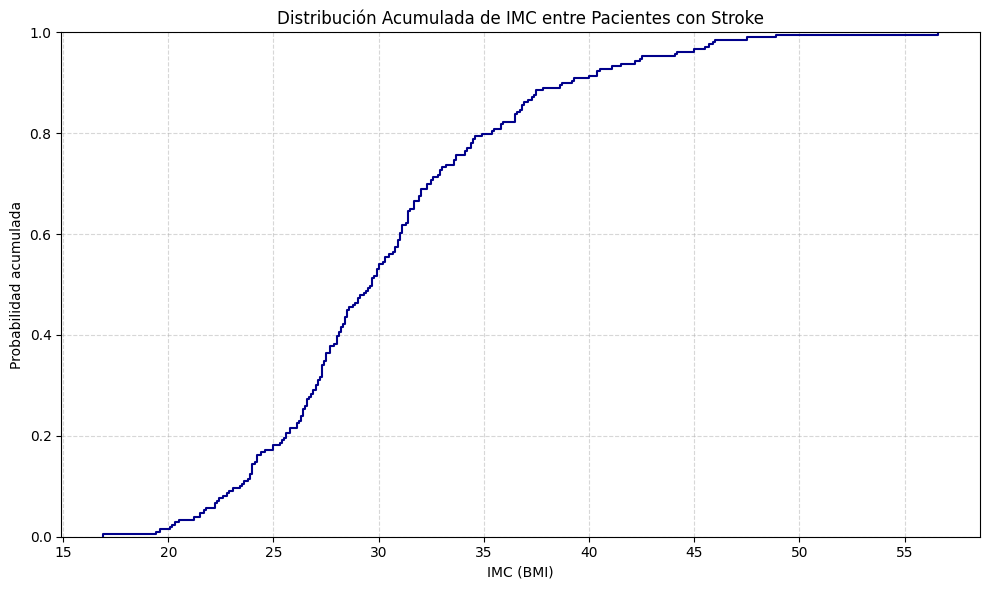

In [131]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df[df['stroke'] == 1], x='bmi', color='darkblue')
plt.title("Distribución Acumulada de IMC entre Pacientes con Stroke")
plt.xlabel("IMC (BMI)")
plt.ylabel("Probabilidad acumulada")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

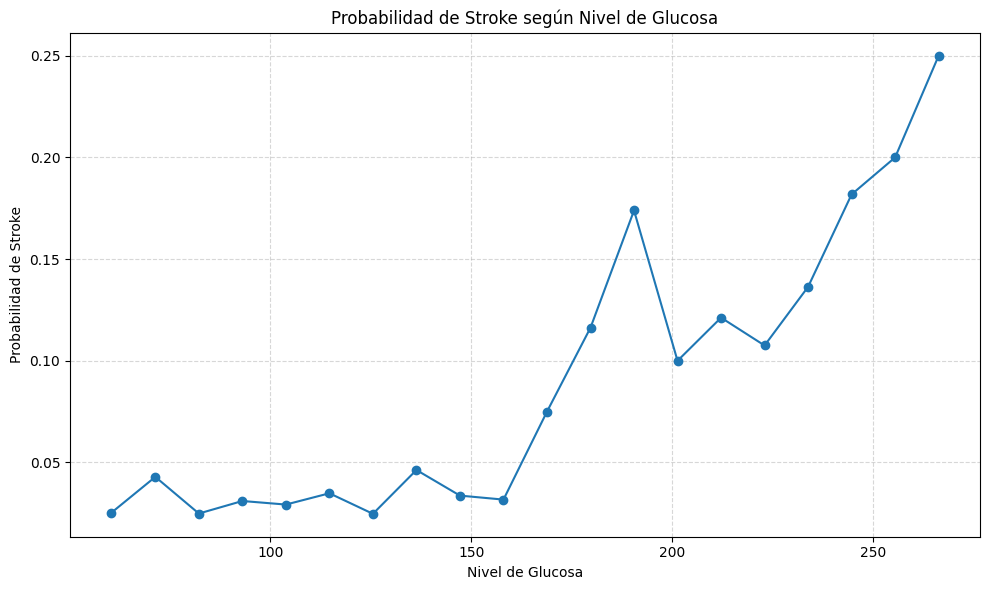

In [132]:


df_plot = df.copy()
df_plot['glucose_bin'] = pd.cut(df_plot['avg_glucose_level'], bins=20)


prob_por_bin = df_plot.groupby('glucose_bin', observed=True)['stroke'].mean().reset_index()
prob_por_bin['glucose_centro'] = prob_por_bin['glucose_bin'].apply(lambda x: x.mid)


plt.figure(figsize=(10, 6))
plt.plot(prob_por_bin['glucose_centro'], prob_por_bin['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según Nivel de Glucosa")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


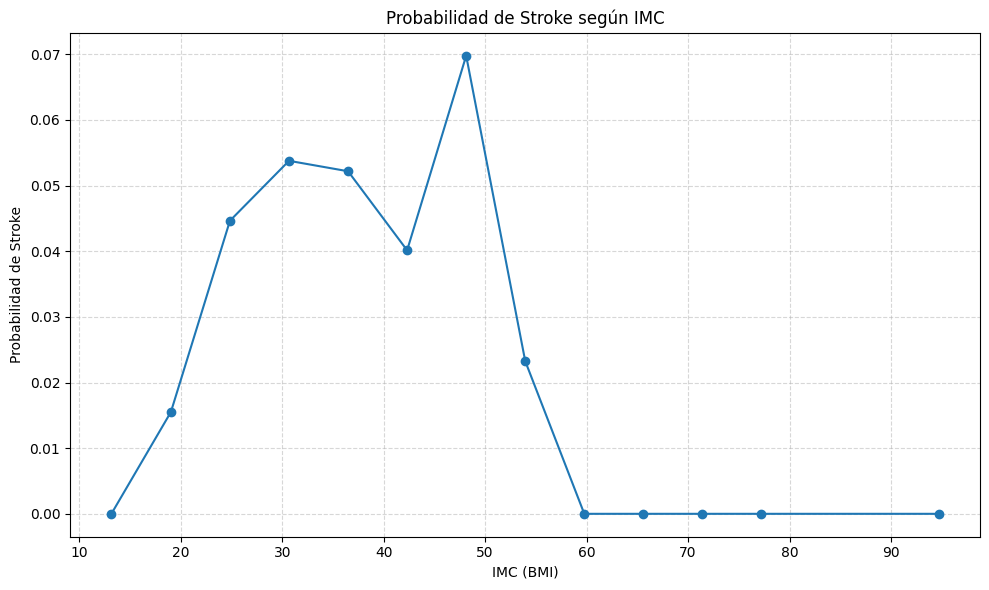

In [133]:
df_plot = df.copy()

# Crear bins de IMC (podés ajustar la cantidad de bins)
df_plot['bmi_bin'] = pd.cut(df_plot['bmi'], bins=15)

# Calcular porcentaje de stroke por bin
prob_por_bmi = df_plot.groupby('bmi_bin', observed=True)['stroke'].mean().reset_index()
prob_por_bmi['bmi_centro'] = prob_por_bmi['bmi_bin'].apply(lambda x: x.mid)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(prob_por_bmi['bmi_centro'], prob_por_bmi['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según IMC")
plt.xlabel("IMC (BMI)")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

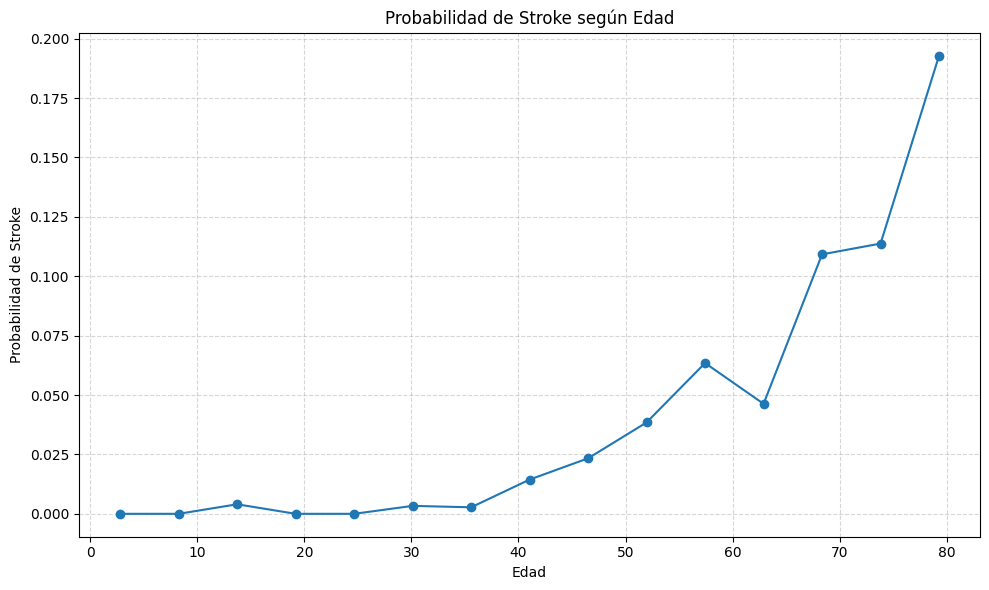

In [134]:
df_plot = df.copy()

# Crear bins de edad (ajustables)
df_plot['age_bin'] = pd.cut(df_plot['age'], bins=15)

# Calcular proporción de strokes por grupo de edad
prob_por_edad = df_plot.groupby('age_bin', observed=True)['stroke'].mean().reset_index()
prob_por_edad['edad_centro'] = prob_por_edad['age_bin'].apply(lambda x: x.mid)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(prob_por_edad['edad_centro'], prob_por_edad['stroke'], marker='o', linestyle='-')
plt.title("Probabilidad de Stroke según Edad")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de Stroke")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

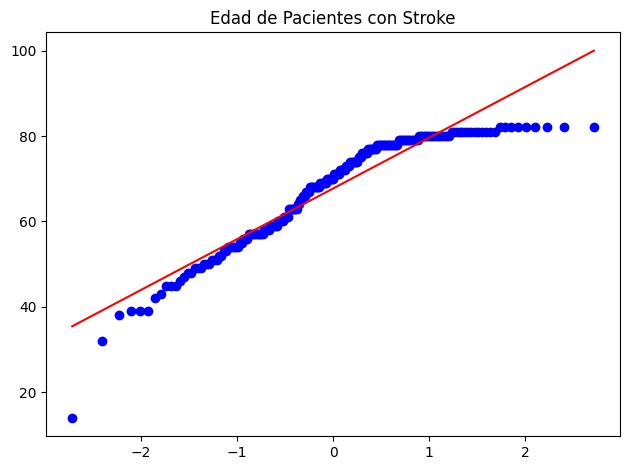

In [135]:
edad_stroke = df[df['stroke'] == 1]['age']

stats.probplot(edad_stroke, dist="norm", plot=plt)
plt.title("Edad de Pacientes con Stroke")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

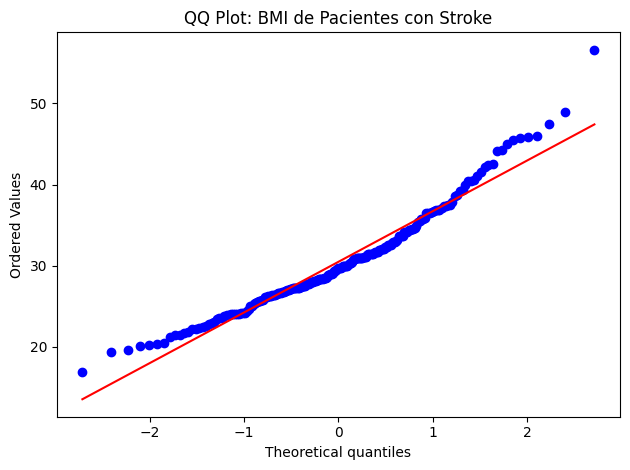

In [136]:
bmi_stroke = df[df['stroke'] == 1]['bmi']

stats.probplot(bmi_stroke.dropna(), dist="norm", plot=plt)
plt.title("QQ Plot: BMI de Pacientes con Stroke")
plt.tight_layout()
plt.show()

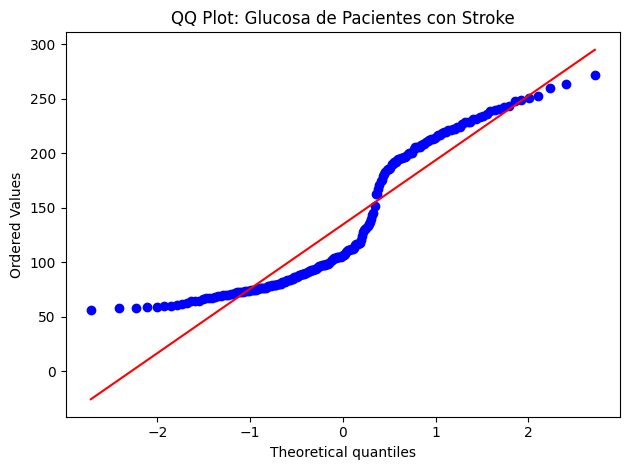

In [137]:
glucosa_stroke = df[df['stroke'] == 1]['avg_glucose_level']

stats.probplot(glucosa_stroke.dropna(), dist="norm", plot=plt)
plt.title("QQ Plot: Glucosa de Pacientes con Stroke")
plt.tight_layout()
plt.show()

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Variables predictoras y objetivo
X = df[['age', 'avg_glucose_level']]
y = df['bmi']

# 2. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear modelo
modelo = LinearRegression()

# 4. Entrenar modelo
modelo.fit(X_train, y_train)

# 5. Predecir sobre los datos de prueba
predicciones = modelo.predict(X_test)

# 6. Evaluar
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, predicciones))
print("R²:", r2_score(y_test, predicciones))


MSE: 61.37334788527144
R²: 0.10326072167030764


In [139]:
print("Coeficientes:", modelo.coef_)  # para age y glucosa
print("Intercepto:", modelo.intercept_)


Coeficientes: [0.10705862 0.01927656]
Intercepto: 22.218696957833853


HIPÓTESIS A CONSIDERAR:
        Las personas con niveles altos de glucosa en sangre y antecedentes de enfermedades cardíacas tienen una mayor probabilidad de sufrir un accidente cerebrovascular 